# Wstępna obróbka datasetu

In [1]:
!pip install tensorflow keras scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Attention, Permute, Multiply, Lambda
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


2025-07-10 12:07:34.619964: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-10 12:07:34.731704: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-10 12:07:34.777676: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752142054.873965  158374 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752142054.894669  158374 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752142055.021369  158374 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## 1a. Wczytaj dataset z filmików lekotrów

### Wczytanie datasetu

In [3]:
df = pd.read_csv('../dataset/videos/videos_dataset.csv')

In [4]:
df.head()

,sample_id,frame,user_id,label,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,...,landmark_18_z,landmark_19_x,landmark_19_y,landmark_19_z,landmark_20_x,landmark_20_y,landmark_20_z,landmark_21_x,landmark_21_y,landmark_21_z
0,1,0,a2,A,0.345417,0.648431,-1.125724e-07,0.363545,0.620765,-0.010274,...,-0.003865,0.321722,0.551512,-0.008457,0.326903,0.565844,-0.005724,0.329682,0.577548,-0.001789
1,1,1,a2,A,0.366266,0.597102,-9.622672e-08,0.391580,0.578109,-0.012907,...,0.000685,0.356418,0.497935,-0.004451,0.361665,0.515749,-0.001988,0.363353,0.523833,0.002337
2,1,2,a2,A,0.400966,0.572690,-1.089629e-07,0.424555,0.552354,-0.004017,...,-0.004296,0.383425,0.481909,-0.009304,0.389207,0.502081,-0.005430,0.391897,0.513775,-0.000924
3,1,3,a2,A,0.418257,0.573744,-1.190043e-07,0.441344,0.563031,-0.007786,...,-0.002903,0.402536,0.489501,-0.009669,0.406139,0.510639,-0.006567,0.409394,0.523706,-0.001918
4,1,4,a2,A,0.431913,0.582072,-1.241054e-07,0.453692,0.577044,-0.009167,...,-0.004793,0.417201,0.501486,-0.012369,0.419653,0.524298,-0.008715,0.422120,0.535854,-0.003439


In [5]:
df.drop('user_id', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13080 entries, 0 to 13079
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sample_id      13080 non-null  int64  
 1   frame          13080 non-null  int64  
 2   label          13080 non-null  object 
 3   landmark_1_x   13080 non-null  float64
 4   landmark_1_y   13080 non-null  float64
 5   landmark_1_z   13080 non-null  float64
 6   landmark_2_x   13080 non-null  float64
 7   landmark_2_y   13080 non-null  float64
 8   landmark_2_z   13080 non-null  float64
 9   landmark_3_x   13080 non-null  float64
 10  landmark_3_y   13080 non-null  float64
 11  landmark_3_z   13080 non-null  float64
 12  landmark_4_x   13080 non-null  float64
 13  landmark_4_y   13080 non-null  float64
 14  landmark_4_z   13080 non-null  float64
 15  landmark_5_x   13080 non-null  float64
 16  landmark_5_y   13080 non-null  float64
 17  landmark_5_z   13080 non-null  float64
 18  landma

In [7]:
# set label as category type
df['label'] = df['label'].astype('category')

## 1b. Wczytaj dataset moj dataset

In [8]:
df2 = pd.read_csv('../dataset/own/own_dataset.csv')

In [9]:
df2.head()

,user_id,label,sample_id,frame,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,...,landmark_18_z,landmark_19_x,landmark_19_y,landmark_19_z,landmark_20_x,landmark_20_y,landmark_20_z,landmark_21_x,landmark_21_y,landmark_21_z
0,1,Z,1,0,0.435695,0.576969,4.036861e-08,0.480515,0.548350,-0.026277,...,-0.048237,0.413569,0.455929,-0.074037,0.423309,0.496448,-0.069420,0.417086,0.505802,-0.059601
1,3,Z,1,0,0.578351,0.609560,5.265319e-08,0.624348,0.585140,-0.014683,...,-0.061790,0.585376,0.526921,-0.080099,0.590219,0.553543,-0.076534,0.579452,0.550328,-0.069926
2,4,Z,1,0,0.507152,0.550208,6.161761e-08,0.538633,0.521261,-0.014309,...,-0.027720,0.487526,0.448841,-0.044816,0.503914,0.473505,-0.041604,0.512892,0.491349,-0.033786
3,1,Z,1,1,0.437542,0.579177,4.156175e-08,0.482692,0.549850,-0.026735,...,-0.047561,0.414696,0.457763,-0.073083,0.424467,0.497505,-0.068846,0.418851,0.507512,-0.059264
4,3,Z,1,1,0.578379,0.609218,5.853659e-08,0.624059,0.584968,-0.014740,...,-0.061531,0.585250,0.526183,-0.079531,0.589327,0.552980,-0.075569,0.577682,0.549286,-0.068727


In [10]:
df2 = df2.drop('user_id', axis=1)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32463 entries, 0 to 32462
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   label          32463 non-null  object 
 1   sample_id      32463 non-null  int64  
 2   frame          32463 non-null  int64  
 3   landmark_1_x   32463 non-null  float64
 4   landmark_1_y   32463 non-null  float64
 5   landmark_1_z   32463 non-null  float64
 6   landmark_2_x   32463 non-null  float64
 7   landmark_2_y   32463 non-null  float64
 8   landmark_2_z   32463 non-null  float64
 9   landmark_3_x   32463 non-null  float64
 10  landmark_3_y   32463 non-null  float64
 11  landmark_3_z   32463 non-null  float64
 12  landmark_4_x   32463 non-null  float64
 13  landmark_4_y   32463 non-null  float64
 14  landmark_4_z   32463 non-null  float64
 15  landmark_5_x   32463 non-null  float64
 16  landmark_5_y   32463 non-null  float64
 17  landmark_5_z   32463 non-null  float64
 18  landma

In [12]:
df2['label'] = df2['label'].astype('category')

## 1c. Połączenie datasetów

In [13]:
# 1. Liczba unikalnych próbek w df
max_sample_id_df = df['sample_id'].max()

# 2. Dodaj przesunięcie do df2
df2['sample_id'] += max_sample_id_df

# 3. Połączenie obu zbiorów
merged_df = pd.concat([df, df2], ignore_index=True)

# (opcjonalnie) Sortuj po sample_id i frame, jeśli potrzebne
merged_df.sort_values(by=['sample_id', 'frame'], inplace=True)

# Przykład zapisu
merged_df.to_csv('both_datasets.csv', index=False)

In [14]:
len(df) + len(df2)

45543

In [15]:
len(merged_df)

45543

## 2. Podziel dataset na sekwencje

In [16]:
landmark_cols = [col for col in merged_df.columns if col.startswith('landmark_')]
sequences, labels = [], []

# group by sample_id
for sample_id, group in merged_df.groupby('sample_id'):
  group = group.reset_index(drop=True)
  label = group.loc[0, 'label']

  #delete unused cols
  data = group.drop(columns=['sample_id','frame', 'label'], axis=1)

  # divide into 30 frames sequences
  for start in range(0, len(data) - 29):
        segment = data.iloc[start:start+30].values
        sequences.append({
            'label': label,
            'sequence': segment  # numpy array 30x63
        })

X = np.array([seq['sequence'] for seq in sequences])
y = np.array([seq['label'] for seq in sequences])


# Normalizacja względem nadgarstka pierwszej klatki w sekwencji

In [17]:
# Normalizacja jednej sekwencji względem nadgarstka pierwszej klatki
def normalize_sequence_wrist_origin(sequence):
    sequence = sequence.copy()
    wrist_origin = sequence[0].reshape(21, 3)[0]

    for i in range(sequence.shape[0]):
        frame = sequence[i].reshape(21, 3)
        normalized = frame - wrist_origin
        sequence[i] = normalized.flatten()

    return sequence

# Zastosowanie normalizacji dla wszystkich sekwencji
X_normalized = np.array([normalize_sequence_wrist_origin(seq) for seq in X])


# Augumentacja danych

## 1. Rotacja o kąt

In [18]:
def get_rotation_matrix(axis: str, angle_rad: float):
    c, s = np.cos(angle_rad), np.sin(angle_rad)
    if axis == 'x':
        return np.array([[1, 0, 0],
                         [0, c, -s],
                         [0, s, c]])
    elif axis == 'y':
        return np.array([[c, 0, s],
                         [0, 1, 0],
                         [-s, 0, c]])
    elif axis == 'z':
        return np.array([[c, -s, 0],
                         [s, c, 0],
                         [0, 0, 1]])

## 2. Odbicie lustrzane

In [19]:
def flip_sequence(sequence):
    flipped = sequence.copy().reshape(-1, 21, 3)
    flipped[:, :, 0] *= -1
    return flipped.reshape(30, 63)

## 3. Dodanie szumu

In [20]:
def add_noise_to_sequence(sequence, noise_level=0.005):
    noisy = sequence.copy()
    noise = np.random.normal(0, noise_level, noisy.shape)
    noisy += noise
    return noisy

# Augumentuj dane

In [21]:
def augment_sequence(sequence, flip=True, noise=True, rotate=True, max_angle=15, step=5, noise_level=0.005):
    augmented = []

    if flip:
      flipped = flip_sequence(sequence)
      augmented.append(flipped)
    if rotate:
        for axis in ['x', 'y', 'z']:
            for angle_deg in range(-max_angle, max_angle + 1, 5):
                if angle_deg == 0:
                    continue  # pomiń rotację o 0 stopni
                angle_rad = np.radians(angle_deg)
                R = get_rotation_matrix(axis, angle_rad)
                rotated = sequence.copy().reshape(-1, 21, 3)
                rotated = rotated @ R.T
                augmented.append(rotated.reshape(30, 63))
    if noise:
        noisy = add_noise_to_sequence(sequence, noise_level)
        augmented.append(noisy)

    return augmented

# Połącz zbiory znormalizowany i rozszerzony

In [22]:
X_augmented = []
y_augmented = []

for i in range(len(X_normalized)):
    base = X_normalized[i]
    label = y[i]

    # oryginał
    X_augmented.append(base)
    y_augmented.append(label)

    # augmentacje deterministyczne
    augmented_versions = augment_sequence(base, flip=True, rotate=True, max_angle=15, step=5)

    for aug in augmented_versions:
        X_augmented.append(aug)
        y_augmented.append(label)

X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

# Porównanie liczby danych przed i po augumentacji

In [23]:
print(len(X_normalized))
print(len(X_augmented))

22372
469812


# Podział na zbiór treningowy, testowy i walidacyjny

In [24]:
from sklearn.model_selection import train_test_split

# Najpierw podziel na trening+walidacja i test (np. 85% / 15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_augmented, y_augmented, test_size=0.15, random_state=42, stratify=y_augmented
)

# Następnie podziel trening+walidację na trening i walidację (np. 85% / 15% z 85%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.15, random_state=42, stratify=y_train_val
)


In [25]:
del X_normalized, X_augmented

# Trenowanie modeli

In [26]:



# Zamiana etykiet na numeryczne i one-hot
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

num_classes = len(le.classes_)

y_train_cat = to_categorical(y_train_enc, num_classes)
y_val_cat = to_categorical(y_val_enc, num_classes)
y_test_cat = to_categorical(y_test_enc, num_classes)


# Model BiLSTM

In [27]:
def create_bilstm_attention_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)  # (30, 63)

    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)

    # Mechanizm Attention
    attention = Dense(1, activation='tanh')(x)
    attention = tf.nn.softmax(attention, axis=1)
    context_vector = tf.reduce_sum(x * attention, axis=1)

    x = Dense(128, activation='relu')(context_vector)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
bilstm_model = create_bilstm_attention_model((30, 63), num_classes)
bilstm_model.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
# Trenowanie
history_bilstm = bilstm_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,           # zwiększona liczba epok
    batch_size=64,
    callbacks=[early_stopping]
)

E0000 00:00:1752142243.761790  158374 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1752142243.764147  158374 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


# Model 1DCNN

In [28]:
def create_1dcnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_1dcnn_model((30, 63), num_classes)
cnn_model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',     # monitoruj stratę walidacyjną
    patience=5,             # zatrzymaj po 5 epokach bez poprawy
    restore_best_weights=True
)

# Trenowanie

history_cnn = cnn_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,             # zwiększona liczba epok
    batch_size=64,
    callbacks=[early_stopping]
)


/home/magda/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 64)         │        12,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 12, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,940 (546.64 KB)

 Trainable params: 139,940 (546.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2025-07-10 12:11:00.795539: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2566158840 exceeds 10% of free system memory.


5304/5304 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.6414 - loss: 1.0764 - val_accuracy: 0.9656 - val_loss: 0.1226
Epoch 2/100
5304/5304 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.9295 - loss: 0.2025 - val_accuracy: 0.9710 - val_loss: 0.0835
Epoch 3/100
5304/5304 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.9530 - loss: 0.1372 - val_accuracy: 0.9816 - val_loss: 0.0474
Epoch 4/100
5304/5304 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.9629 - loss: 0.1096 - val_accuracy: 0.9914 - val_loss: 0.0267
Epoch 5/100
5304/5304 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.9715 - loss: 0.0834 - val_accuracy: 0.9800 - val_loss: 0.0515
Epoch 6/100
5304/5304 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.9768 - loss: 0.0685 - val_accuracy: 0.9908 - val_loss: 0.0275
Epoch 7/100
5304/5304 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.9781 - loss: 0.0650 - val_accuracy: 0.9821 - val_loss: 0.0473
Epoch 8/100
5304/5304 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.9806 - loss: 0.057

# Ewaluacja

In [63]:
bilstm_model.evaluate(X_test, y_test_cat)
cnn_model.evaluate(X_test, y_test_cat)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9050 - loss: 0.3030
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8956 - loss: 0.3039


[0.30730289220809937, 0.8893740773200989]

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Classification report dla BiLSTM:
              precision    recall  f1-score   support

           A       0.97      1.00      0.98        30
         A_A       0.97      0.97      0.97        30
           B       1.00      0.97      0.98        32
           C       0.91      1.00      0.96        32
          CH       0.84      0.96      0.90        27
          CZ       0.94      1.00      0.97        30
         C_C       0.97      0.97      0.97        32
           D       1.00      0.97      0.98        32
           E       1.00      1.00      1.00        35
         E_E       1.00      0.97      0.98        32
           F       1.00      0.97      0.98        32
           G       1.00      1.00      1.00        32
           H       0.86      0.78      0.82        32
           I       1.00      1.00      1.00        32
           J       1.00      1.00      1.00        32
           K       1.00      0.94      0.97        32
       

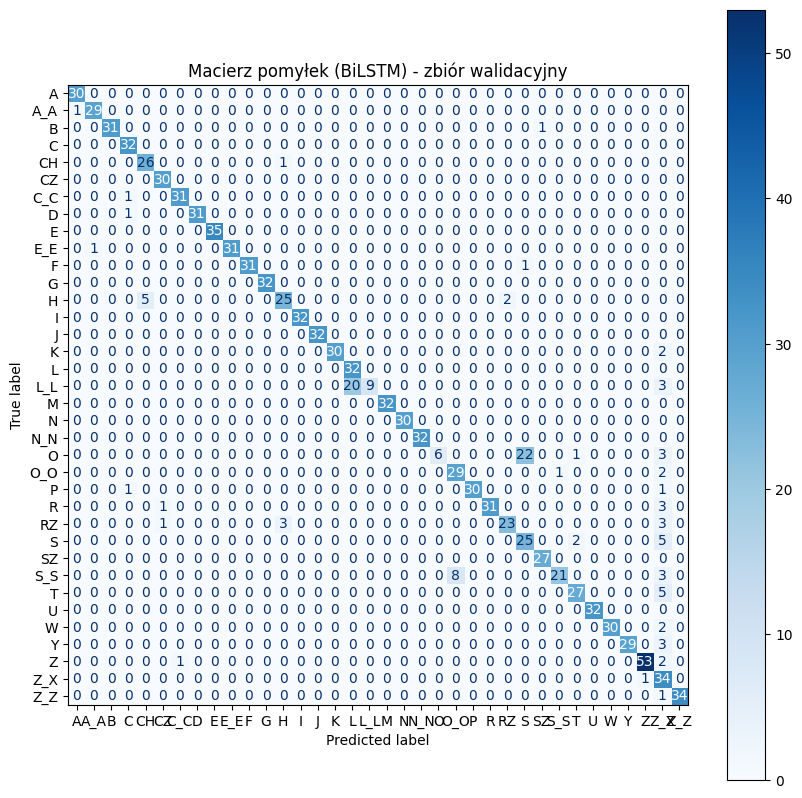

In [64]:
label_names = le.classes_

# Predykcje na zbiorze walidacyjnym
y_pred_probs = bilstm_model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val_cat, axis=1)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Classification report dla BiLSTM:")
print(classification_report(y_true, y_pred, target_names=label_names))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Macierz pomyłek (BiLSTM) - zbiór walidacyjny")
plt.show()


In [ ]:
# Predykcje na zbiorze walidacyjnym dla 1DCNN
y_pred_probs_cnn = cnn_model.predict(X_val)
y_pred_cnn = np.argmax(y_pred_probs_cnn, axis=1)

print("Classification report dla 1DCNN:")
print(classification_report(y_true, y_pred_cnn, target_names=label_names))

cm_cnn = confusion_matrix(y_true, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp_cnn.plot(ax=ax, cmap=plt.cm.Greens)
plt.title("Macierz pomyłek (1DCNN) - zbiór walidacyjny")
plt.show()


# Zapis modeli

In [65]:
bilstm_model.save('bilstm_model_attention.keras')
# cnn_model.save('cnn_model.keras')


In [ ]:
with open('../model/2025-07-14/labels.txt', 'w') as f:
    for label in label_names:
        f.write(label + '\n')


In [ ]:
import numpy as np
import gc

# Zapis danych po normalizacji
np.save('X_normalized.npy', X_normalized)
np.save('y_labels.npy', y)

# Czyszczenie RAM
del X_normalized
del y
gc.collect()


In [ ]:
import numpy as np
import gc

X_file = 'X_augmented.npy'
y_file = 'y_augmented.npy'

# Przygotuj puste pliki
first_sample = np.load('X_normalized.npy', mmap_mode='r')[0]
seq_len, num_joints, dims = first_sample.shape
np.save(X_file, np.empty((0, seq_len, num_joints, dims), dtype=np.float32))
np.save(y_file, np.empty((0,), dtype=np.int32))

X_normalized = np.load('X_normalized.npy', mmap_mode='r')
y = np.load('y_labels.npy', mmap_mode='r')

for i in range(len(X_normalized)):
    base = X_normalized[i]
    label = y[i]

    augmented_versions = [base] + augment_sequence(base, flip=True, rotate=True, max_angle=15, step=5)
    labels = [label] * len(augmented_versions)

    # Wczytaj poprzedni stan
    X_existing = np.load(X_file)
    y_existing = np.load(y_file)

    # Dopisz
    X_combined = np.concatenate((X_existing, np.array(augmented_versions, dtype=np.float32)))
    y_combined = np.concatenate((y_existing, np.array(labels, dtype=np.int32)))

    # Zapisz
    np.save(X_file, X_combined)
    np.save(y_file, y_combined)

    # Uwolnij RAM
    del X_existing, y_existing, X_combined, y_combined, augmented_versions, labels
    gc.collect()


In [ ]:
import numpy as np
from sklearn.utils import shuffle
import gc

# Wczytaj dane z plików
X = np.load('X_augmented.npy', mmap_mode='r')
y = np.load('y_augmented.npy', mmap_mode='r')

# Shuffle (jeśli potrzebne)
X, y = shuffle(X, y, random_state=42)

gc.collect()


In [ ]:
import numpy as np
import gc

# Zapis danych po normalizacji
np.save('X_normalized.npy', X_normalized)
np.save('y_labels.npy', y)

# Czyszczenie RAM
del X_normalized
del y
gc.collect()


In [ ]:
import numpy as np
import gc

X_file = 'X_augmented.npy'
y_file = 'y_augmented.npy'

# Przygotuj puste pliki
first_sample = np.load('X_normalized.npy', mmap_mode='r')[0]
seq_len, num_joints, dims = first_sample.shape
np.save(X_file, np.empty((0, seq_len, num_joints, dims), dtype=np.float32))
np.save(y_file, np.empty((0,), dtype=np.int32))

X_normalized = np.load('X_normalized.npy', mmap_mode='r')
y = np.load('y_labels.npy', mmap_mode='r')

for i in range(len(X_normalized)):
    base = X_normalized[i]
    label = y[i]

    augmented_versions = [base] + augment_sequence(base, flip=True, rotate=True, max_angle=15, step=5)
    labels = [label] * len(augmented_versions)

    # Wczytaj poprzedni stan
    X_existing = np.load(X_file)
    y_existing = np.load(y_file)

    # Dopisz
    X_combined = np.concatenate((X_existing, np.array(augmented_versions, dtype=np.float32)))
    y_combined = np.concatenate((y_existing, np.array(labels, dtype=np.int32)))

    # Zapisz
    np.save(X_file, X_combined)
    np.save(y_file, y_combined)

    # Uwolnij RAM
    del X_existing, y_existing, X_combined, y_combined, augmented_versions, labels
    gc.collect()


In [ ]:
import numpy as np
from sklearn.utils import shuffle
import gc

# Wczytaj dane z plików
X = np.load('X_augmented.npy', mmap_mode='r')
y = np.load('y_augmented.npy', mmap_mode='r')

# Shuffle (jeśli potrzebne)
X, y = shuffle(X, y, random_state=42)

gc.collect()
